In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from nuq.dup import NuqClassifierDup


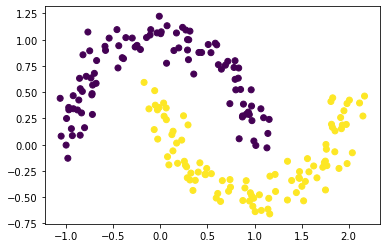

In [3]:
x, y = make_moons(200)
x += 0.1 * np.random.randn(200, 2)
plt.scatter(x[:, 0], x[:, 1], c=y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=40)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=40)

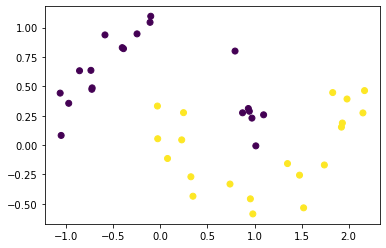

In [4]:
plt.scatter(x_val[:, 0], x_val[:, 1], c=y_val)

initialized
fitted
(40,)
[1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0
 0 1 1]


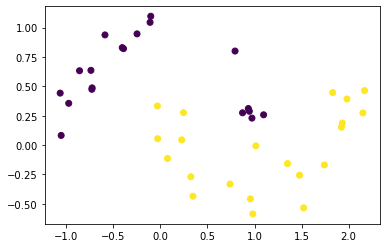

In [20]:
model = NuqClassifierDup()
print('initialized')

model.fit(x_train, y_train)
print('fitted')

predictions = model.predict(x_val)
print(predictions.shape)
print(y_val)
plt.scatter(x_val[:, 0], x_val[:, 1], c=np.array(predictions))

(1600, 2)


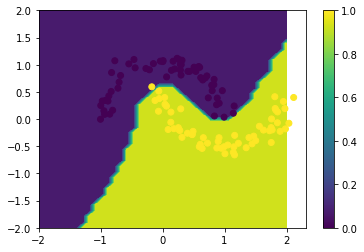

In [32]:
x_mesh = np.array(np.meshgrid(np.linspace(-2, 2, 40), np.linspace(-2, 2, 40))).reshape(2, -1)
x_mesh = np.moveaxis(x_mesh, 0, 1)
print(x_mesh.shape)

prediction_mesh = model.predict(x_mesh)
# plt.scatter(x_mesh[:, 0], x_mesh[:, 1], c=prediction_mesh)
plt.contourf(x_mesh[:, 0].reshape((40, 40)), x_mesh[:, 1].reshape(40, 40), prediction_mesh.reshape(40, 40))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.colorbar()